In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import markov_clustering as mc
import networkx as nx

In [325]:
nodes = pd.read_json(r"..\bin\Debug\netcoreapp2.2\maps2\prob-300.graph", orient='records', lines = True)

In [287]:
nodes = nodes.sort_values('Id')

In [288]:
graph = nx.Graph()
for node in nodes.iterrows():
    graph.add_star([node[1].Id] + node[1].ConnectedIds)

In [294]:
matrix = nx.adjacency_matrix(graph, nodelist=nodes.Id)
#result = mc.run_mcl(matrix, inflation=1.4, expansion=2, iterations=400)
result = mc.run_mcl(matrix, inflation=1.2, expansion=2, iterations=400)
clusters = mc.get_clusters(result) 

In [295]:
def to_color(coords):
    coords = coords.astype(int)
    return '#' + ''.join('%02x'%i for i in coords)

In [296]:
id_to_color = {}

for cluster in clusters:
    color = np.random.randint(128, 256, 3)
    for node in cluster:
        id_to_color[node] = color

In [297]:
nodes['color'] = nodes.Id.map(id_to_color)

In [331]:
plt.rcParams['figure.dpi']=200

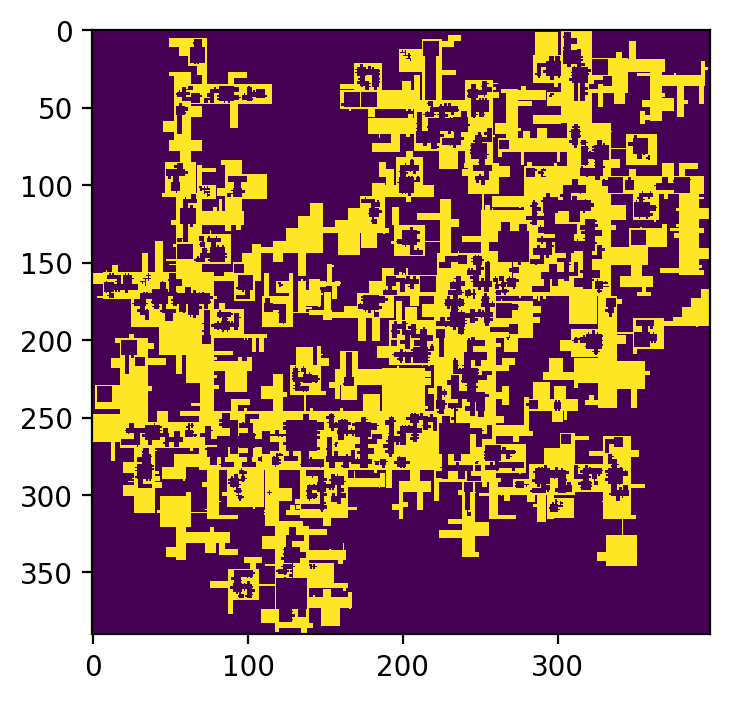

In [332]:
image = np.zeros((nodes.X.max() + 1, nodes.Y.max() + 1, 3))
for node in nodes.iterrows():
    image[node[1].X, node[1].Y] = np.array([254,254,254])
plt.imshow(image[:,:,0])

In [333]:
for i in range(205, 301):
    print(i)
    nodes = pd.read_json(r"..\bin\Debug\netcoreapp2.2\maps2\prob-" + f"{i:03d}" + ".graph", orient='records', lines = True)
    nodes = nodes.sort_values('Id')
    graph = nx.Graph()
    for node in nodes.iterrows():
        graph.add_star([node[1].Id] + node[1].ConnectedIds)
        
    matrix = nx.adjacency_matrix(graph, nodelist=nodes.Id)
    result = mc.run_mcl(matrix, inflation=1.4, expansion=2, iterations=400)
    clusters = mc.get_clusters(result) 
    
    for clusterNum in range(len(clusters)):
        for node in clusters[clusterNum]:
            id_to_color[node] = clusterNum
    nodes['cluster'] = nodes.Id.map(id_to_color)
    nodes.to_json(r"..\bin\Debug\netcoreapp2.2\clusters\prob-" + str(i) + ".clusters", orient='records', lines = True)

205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
